In [2]:
import shap
import pickle
import pandas as pd, numpy as np
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn_pandas import DataFrameMapper

import matplotlib.pyplot as plt

In [3]:
model = pickle.load(open('../models/finalized_model_scoring.sav', 'rb'))

In [4]:
clean_data = pd.read_csv('clean_data.csv', infer_datetime_format = True)

In [5]:
numerical_cols=['sub_grade_num', 'short_emp', 'emp_length_num','dti', 'payment_inc_ratio', 'delinq_2yrs', \
                'delinq_2yrs_zero', 'inq_last_6mths', 'last_delinq_none', 'last_major_derog_none', 'open_acc',\
                'pub_rec', 'pub_rec_zero','revol_util']

categorical_cols=['grade', 'home_ownership', 'purpose']

mapper = DataFrameMapper([
    ('grade',sklearn.preprocessing.LabelBinarizer()),
    ('home_ownership', sklearn.preprocessing.LabelBinarizer()),
    ('purpose', sklearn.preprocessing.LabelBinarizer()),],
df_out=True)

X1 = mapper.fit_transform(clean_data)

df = pd.concat([X1, clean_data[numerical_cols]])

X2 = np.array(clean_data[numerical_cols])


X = np.hstack((X1,X2)) #Combines X1 and X2 side by side, i.e. stacks them horizontally
y = np.array(clean_data['bad_loans'])

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100, stratify=y)

In [7]:
model.score(X_test, y_test)

0.8111542359892215

## classical random forest feature importance

Pros:
* fast calculation
* easy to retrieve — one command <br />


Cons:
* biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables

In [8]:
model.feature_importances_

array([2.30887870e-01, 9.23425995e-02, 8.80143299e-03, 6.71423099e-02,
       6.52184085e-02, 6.94255912e-02, 1.75002609e-02, 9.29970882e-03,
       4.61089460e-04, 7.30520481e-05, 6.59183503e-03, 0.00000000e+00,
       7.66032573e-03, 1.83003484e-04, 0.00000000e+00, 3.91641092e-04,
       6.17269512e-04, 0.00000000e+00, 8.00274918e-04, 2.31970742e-03,
       1.14397190e-02, 1.96806286e-04, 3.25496911e-05, 5.77436537e-03,
       1.55627958e-03, 7.22090016e-03, 1.14436382e-01, 1.65930638e-01,
       8.34654432e-04, 1.96921753e-03, 1.94803424e-02, 5.44442990e-03,
       1.67277854e-03, 4.98577687e-03, 2.17311770e-03, 2.01855370e-03,
       7.51171082e-02])

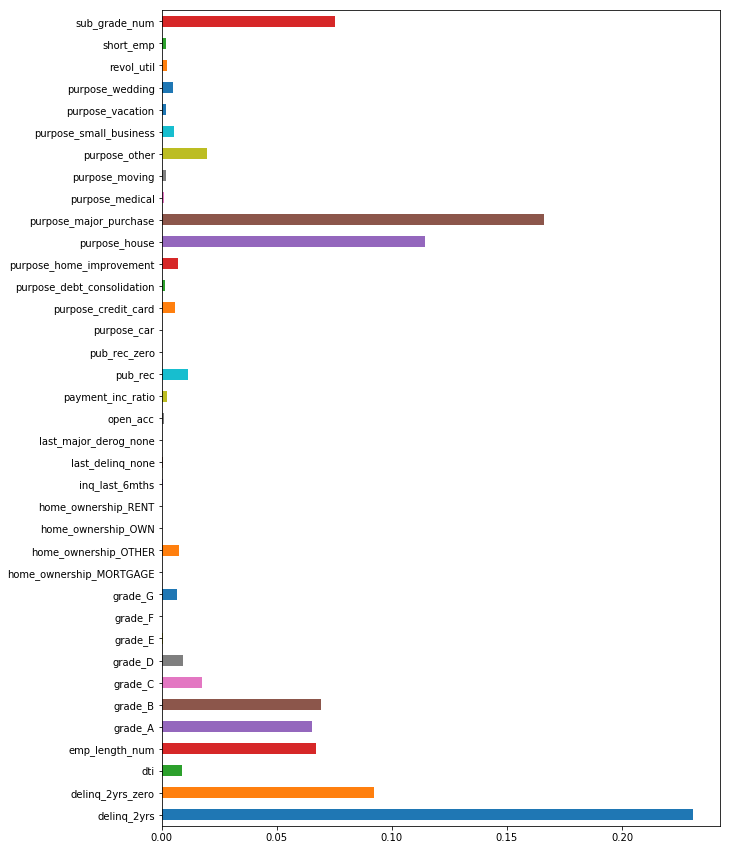

In [9]:
plt.figure(figsize=(10, 15))
pd.Series(model.feature_importances_, index=df.columns).plot(kind='barh')

## Shap tool

In [11]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [14]:
subsample = X[np.random.randint(X.shape[0], size=200), :] 

In [15]:
subsample.shape

(200, 37)

In [16]:
explainer = shap.KernelExplainer(model.predict_proba, subsample)
shap_values = explainer.shap_values(subsample)

Using 200 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
  0%|          | 0/200 [00:00<?, ?it/s]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  0%|          | 1/200 [00:02<06:44,  2.03s/it]/Users/costef

  6%|▌         | 11/200 [00:20<06:08,  1.95s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  6%|▌         | 12/200 [00:22<06:25,  2.05s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecat

 11%|█         | 22/200 [00:43<05:37,  1.90s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 12%|█▏        | 23/200 [00:45<05:29,  1.86s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecat

 16%|█▋        | 33/200 [01:03<05:00,  1.80s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 17%|█▋        | 34/200 [01:04<04:56,  1.79s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecat

 22%|██▏       | 44/200 [01:25<05:41,  2.19s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 22%|██▎       | 45/200 [01:27<05:18,  2.06s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecat

 28%|██▊       | 55/200 [01:45<04:34,  1.89s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 28%|██▊       | 56/200 [01:47<04:38,  1.93s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecat

 33%|███▎      | 66/200 [02:07<04:35,  2.05s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 34%|███▎      | 67/200 [02:09<04:25,  2.00s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecat

 38%|███▊      | 77/200 [02:28<03:58,  1.94s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 39%|███▉      | 78/200 [02:30<03:57,  1.95s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecat

 44%|████▍     | 88/200 [02:52<03:57,  2.12s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 44%|████▍     | 89/200 [02:54<03:55,  2.12s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecat

 50%|████▉     | 99/200 [03:14<03:22,  2.01s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 50%|█████     | 100/200 [03:16<03:14,  1.94s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is depreca

 55%|█████▌    | 110/200 [03:35<02:51,  1.90s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 56%|█████▌    | 111/200 [03:37<02:52,  1.94s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprec

 60%|██████    | 121/200 [03:57<02:59,  2.27s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 61%|██████    | 122/200 [04:00<02:59,  2.30s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprec

 66%|██████▌   | 132/200 [04:21<02:18,  2.04s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 66%|██████▋   | 133/200 [04:23<02:19,  2.08s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprec

 72%|███████▏  | 143/200 [04:42<01:44,  1.82s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 72%|███████▏  | 144/200 [04:44<01:40,  1.79s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprec

 77%|███████▋  | 154/200 [05:02<01:22,  1.78s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 78%|███████▊  | 155/200 [05:04<01:20,  1.79s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprec

 82%|████████▎ | 165/200 [05:24<01:09,  2.00s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 83%|████████▎ | 166/200 [05:26<01:05,  1.93s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprec

 88%|████████▊ | 176/200 [05:44<00:43,  1.81s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 88%|████████▊ | 177/200 [05:46<00:41,  1.80s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprec

 94%|█████████▎| 187/200 [06:05<00:25,  1.95s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 94%|█████████▍| 188/200 [06:07<00:24,  2.01s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprec

 99%|█████████▉| 198/200 [06:28<00:04,  2.13s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|█████████▉| 199/200 [06:30<00:02,  2.08s/it]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprec

            'grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies 
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used

In [23]:
# shap.force_plot(explainer.expected_value[0], shap_values[0], subsample, feature_names=df.columns)

## Summary plot

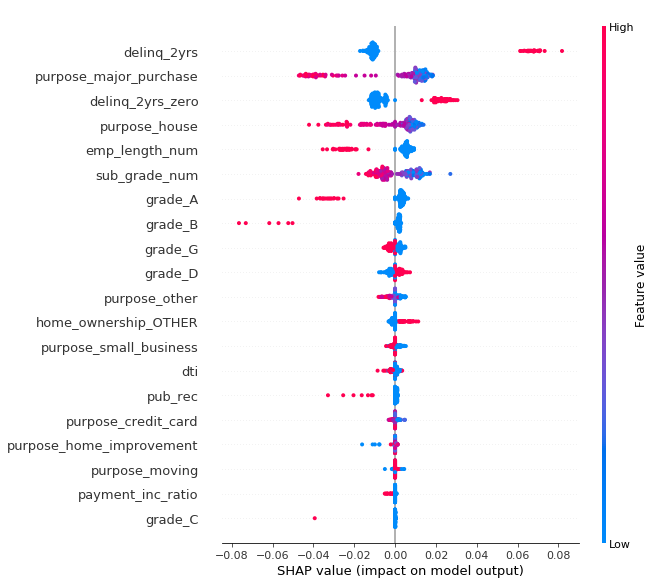

In [17]:
shap.summary_plot( shap_values[0], subsample, feature_names=df.columns)

## Dependence plot for most influential features

### delinq_2yrs - number of delinquincies

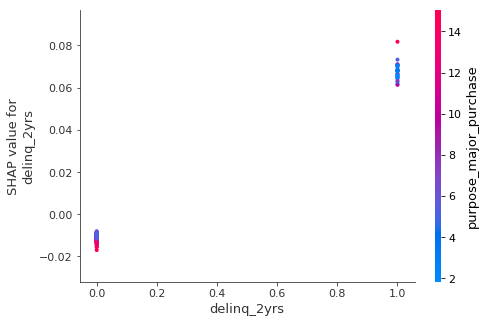

In [21]:
shap.dependence_plot('delinq_2yrs', shap_values[0], subsample, feature_names=df.columns)

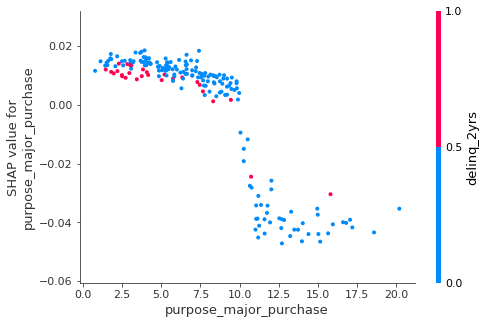

In [23]:
shap.dependence_plot('purpose_major_purchase', shap_values[0], subsample, feature_names=df.columns)

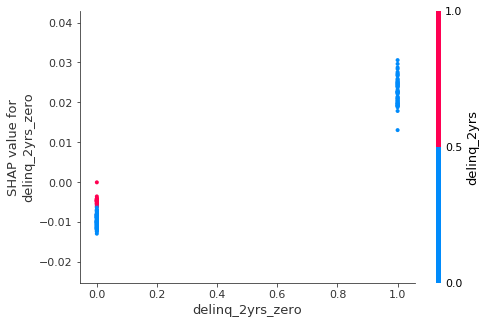

In [24]:
shap.dependence_plot('delinq_2yrs_zero', shap_values[0], subsample, feature_names=df.columns)

### emp_length_num - years of employment

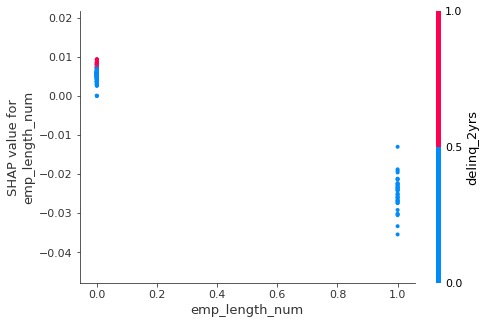

In [25]:
shap.dependence_plot('emp_length_num', shap_values[0], subsample, feature_names=df.columns)

### Force plot for single obs

In [26]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0], subsample[0], feature_names=df.columns)